In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load your data
data_score = pd.read_csv('/content/merged_df.csv')



In [ ]:
data_score

,LIQUIDITY,INSURANCE_COMPANY,INSURANCE_RATE,CONTRACT_NO,RATE,PRODUCT_CATEGORY,LOAN_TERM,MONTH_INTEREST,LOAN_PURPOSE,LOAN_AMOUNT,...,customer_income,income_resource,accommodation_type,weight,height,creditibility,age,no,_merge,age_group
0,3.0,0.0,3.75,571094.0,3.0,0.0,36.0,2.000,1.0,3450000.0,...,6993000.0,5,0,88.000000,170.00000,5,36,86399,Matched (3),30-39
1,3.0,1.0,3.75,569518.0,4.0,1.0,24.0,2.600,3.0,3060000.0,...,6994000.0,5,3,64.000000,141.00000,4,23,238413,Matched (3),20-29
2,1.0,0.0,3.75,569723.0,0.0,0.0,24.0,1.700,3.0,1520000.0,...,6995000.0,5,1,74.989998,161.99001,4,28,232519,Matched (3),20-29
3,4.0,1.0,3.75,569501.0,0.0,1.0,15.0,2.000,3.0,1474500.0,...,6995000.0,5,1,72.000000,179.00000,3,31,230608,Matched (3),30-39
4,4.0,1.0,3.75,NaN,2.0,0.0,24.0,1.700,3.0,3060000.0,...,6995320.0,5,1,59.000000,172.00000,3,23,208030,Matched (3),20-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321145,5.0,0.0,3.00,421483.0,1.0,1.0,36.0,2.200,3.0,2490600.0,...,19366000.0,1,0,74.000000,166.00000,3,48,354669,Matched (3),40-49
321146,0.0,1.0,3.00,775752.0,4.0,1.0,24.0,2.200,3.0,280000.0,...,19367000.0,5,3,92.000000,179.00000,4,39,29356,Matched (3),30-39
321147,2.0,1.0,3.00,421929.0,3.0,5.0,36.0,0.800,3.0,3000000.0,...,19369000.0,5,0,57.000000,175.00000,1,40,169849,Matched (3),40-49
321148,0.0,1.0,3.00,421749.0,4.0,1.0,24.0,2.200,3.0,3000000.0,...,19370000.0,5,1,91.000000,150.00000,0,24,123976,Matched (3),20-29


In [ ]:
 Assuming 'X' and 'y' are derived from 'data_score'
# For example:
X = data_score[['LIQUIDITY',    'INSURANCE_COMPANY',    'INSURANCE_RATE',   'CONTRACT_NO',  'RATE', 'PRODUCT_CATEGORY', 'LOAN_TERM',
    'MONTH_INTEREST',   'LOAN_PURPOSE', 'LOAN_AMOUNT',  'customer_income','income_resource',    'accommodation_type',   'creditibility','age']]  # Use double square brackets to select multiple columns
y = data_score['PRODUCT_CATEGORY']  # Replace with your actual target variable column name


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through columns of X and apply label encoding to object (string) type columns
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Now you can proceed with train_test_split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

SyntaxError: invalid syntax (<ipython-input-7-6d654019f29b>, line 1)

In [ ]:

# For example:
X = data_score[['LIQUIDITY',    'INSURANCE_COMPANY',    'INSURANCE_RATE',   'CONTRACT_NO',  'RATE', 'PRODUCT_CATEGORY', 'LOAN_TERM',
    'MONTH_INTEREST',   'LOAN_PURPOSE', 'LOAN_AMOUNT',  'customer_income','income_resource',    'accommodation_type',   'creditibility','age']]  # Use double square brackets to select multiple columns
y = data_score['PRODUCT_CATEGORY']  # Replace with your actual target variable column name


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through columns of X and apply label encoding to object (string) type columns
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Now you can proceed with train_test_split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

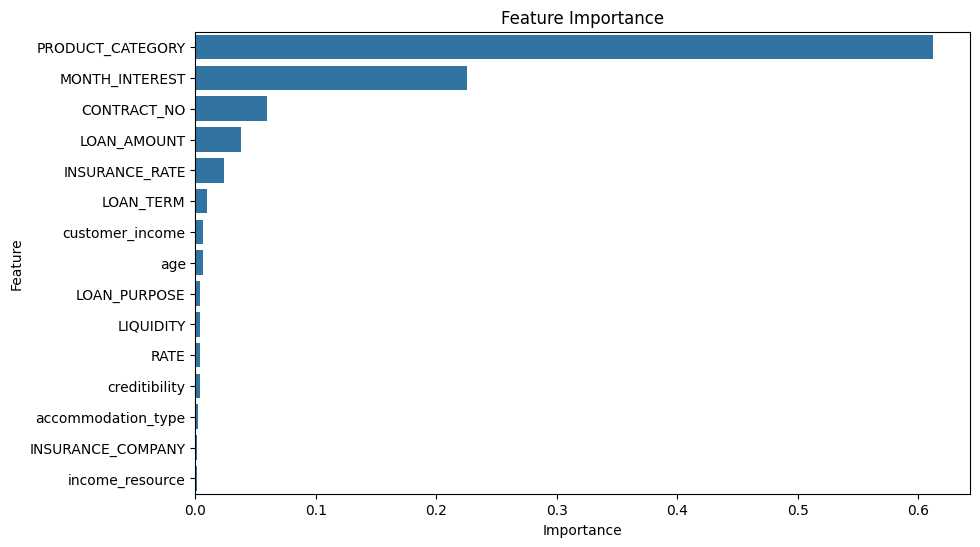

In [ ]:
# Get feature importances

importances = rf_classifier.feature_importances_  # For classification

# Create a DataFrame to hold feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()